In [288]:
# 导入相关依赖
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix

In [289]:
# 定义绘制混淆矩阵
def plot_confusion_matrix(cm, labels_name, title):
    plt.imshow(cm, cmap='Pastel1')  # 在特定的窗口上显示图像
    for x in range(len(cm)): #数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(y, x), horizontalalignment='center', verticalalignment='center')
    plt.title(title, fontsize=15)  # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)  # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)  # 将标签印在y轴坐标上
    plt.ylabel('True label', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.xlabel('Predicted label', fontsize=15) 

# 1.乳腺癌数据集

In [290]:
cancer = pd.read_csv("preprocessing_cancer.csv")
cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [291]:
X,y=cancer.iloc[:,:9],cancer.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)

# 1.1 随机森林模型

In [292]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_predict = forest.predict(X_test)

In [293]:
#输出评价指标
c_matrix = confusion_matrix(y_test, y_predict)
accuracy_forest = accuracy_score(y_test, y_predict)
recall_forest = recall_score(y_test,y_predict, average="macro")
precision_forest = precision_score(y_test, y_predict, average="macro")
f1_forest = f1_score(y_test, y_predict, average="macro") 
print("混淆矩阵：\n",c_matrix)
print("accuracy;{0:.4f}\nrecall:{1:.4f}\nprecision:{2:.4f}\nf1:{3:.4f}".format(accuracy_forest,recall_forest,precision_forest,f1_forest))

混淆矩阵：
 [[127   3]
 [  4  69]]
accuracy;0.9655
recall:0.9611
precision:0.9639
f1:0.9625


随机森林混淆矩阵：
 [[127   3]
 [  4  69]]


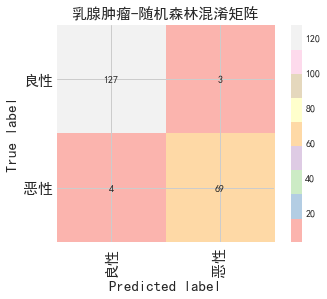

In [294]:
c_matrix_forest = confusion_matrix(y_test, y_predict)
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
print("随机森林混淆矩阵：\n",c_matrix_forest )
plot_confusion_matrix(c_matrix_forest,["良性","恶性"], "乳腺肿瘤-随机森林混淆矩阵")
plt.show()

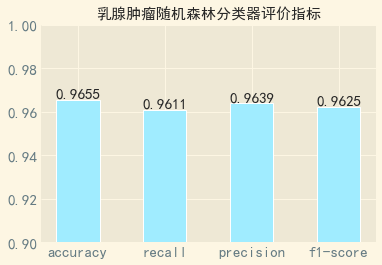

In [295]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('Solarize_Light2')
x = ["accuracy","recall","precision","f1-score"]
y = [accuracy_forest,recall_forest,precision_forest,f1_forest]
plt.ylim([0.9,1.0])
plt.bar(x, y,color='#A0ECFF',width = 0.5)
plt.title('乳腺肿瘤随机森林分类器评价指标',fontsize = 15)
plt.tick_params(labelsize=15)
for a, b in zip(x, y):
    plt.text(a, b, "%.4f"%b, ha='center', va='bottom',fontsize = 15)
plt.show()

# 1.2 Adaboost模型

In [296]:
#决策树
my_deci_tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1)
#以决策树为基函数的adaboost分类器
my_ada = AdaBoostClassifier(base_estimator=my_deci_tree,learning_rate=1.0,n_estimators=400,algorithm='SAMME.R')
my_ada.fit(X_train,y_train)
y_predict = my_ada.predict(X_test)

In [297]:
#输出评价指标
c_matrix_adaboost = confusion_matrix(y_test, y_predict)
accuracy_adaboost = accuracy_score(y_test, y_predict)
recall_adaboost = recall_score(y_test,y_predict, average="macro")
precision_adaboost = precision_score(y_test, y_predict, average="macro")
f1_adaboost = f1_score(y_test, y_predict, average="macro") 
print("混淆矩阵：\n",c_matrix)
print("accuracy;{0:.4f}\nrecall:{1:.4f}\nprecision:{2:.4f}\nf1:{3:.4f}".format(accuracy_adaboost,recall_adaboost,precision_adaboost,f1_adaboost))

混淆矩阵：
 [[127   3]
 [  4  69]]
accuracy;0.9704
recall:0.9739
precision:0.9636
f1:0.9683


随机森林混淆矩阵：
 [[125   5]
 [  1  72]]


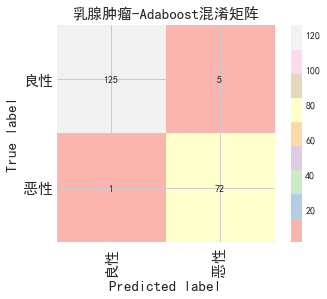

In [298]:
c_matrix_adaboost = confusion_matrix(y_test, y_predict)
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
print("随机森林混淆矩阵：\n",c_matrix_adaboost )
plot_confusion_matrix(c_matrix_adaboost,["良性","恶性"], "乳腺肿瘤-Adaboost混淆矩阵")
plt.show()

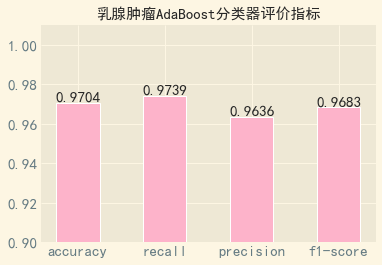

In [299]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('Solarize_Light2')
x = ["accuracy","recall","precision","f1-score"]
y = [accuracy_adaboost,recall_adaboost,precision_adaboost,f1_adaboost]
plt.ylim([0.90,1.01])
plt.bar(x, y,color='#FDB3CA',width = 0.5)
plt.title('乳腺肿瘤AdaBoost分类器评价指标',fontsize = 15)
plt.tick_params(labelsize=15)
for a, b in zip(x, y):
    plt.text(a, b, "%.4f"%b, ha='center', va='bottom',fontsize = 15)
plt.show()

# 1.3 分类器性能对比

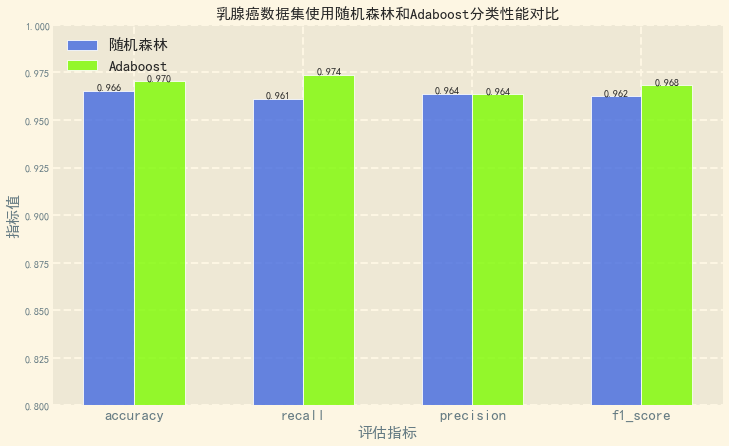

In [300]:
# 对比乳腺癌数据集在随机森林和Adaboost上的性能
forest_list=[accuracy_forest,recall_forest,precision_forest,f1_forest]
adaboost_list=[accuracy_adaboost,recall_adaboost,precision_adaboost,f1_adaboost]
plt.style.use('Solarize_Light2')
def autolabel(rects):
    for i in rects:
        h = i.get_height()
        plt.text(i.get_x() + i.get_width() / 2, h, '{:.3f}'.format(h), ha='center', va='bottom')
x = np.array(list(range(1,5)))
bar_width=0.3
plt.figure(figsize=(12,7))
plot_forest = plt.bar(x-bar_width/2, forest_list, width=bar_width,align='center',label = '随机森林',alpha = 0.8,color = 'royalblue')
plot_adaboost = plt.bar(x+bar_width/2,adaboost_list, width=bar_width,align='center',label = 'Adaboost',alpha = 0.8,color = 'lawngreen')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('评估指标',size = 15)
plt.ylabel('指标值',size = 15)
plt.ylim([0.8,1.0])
autolabel(plot_forest)
autolabel(plot_adaboost)
plt.title('乳腺癌数据集使用随机森林和Adaboost分类性能对比',size = 15)
plt.grid(b = True,ls = '--',linewidth = 2)
plt.xticks(x,["accuracy","recall","precision","f1_score"] ,size = 15)
plt.legend(loc ='upper left',fontsize = 15)
plt.show()

# 2.鸢尾花数据集

In [397]:
iris= pd.read_csv("preprocessing_iris.csv")
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [398]:
X,y=iris.iloc[:,:4],iris.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

# 2.1 随机森林模型

In [399]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_predict = forest.predict(X_test)

In [400]:
#输出评价指标
c_matrix = confusion_matrix(y_test, y_predict)
accuracy_forest = accuracy_score(y_test, y_predict)
recall_forest = recall_score(y_test,y_predict, average="macro")
precision_forest = precision_score(y_test, y_predict, average="macro")
f1_forest = f1_score(y_test, y_predict, average="macro") 
print("混淆矩阵：\n",c_matrix)
print("accuracy;{0:.4f}\nrecall:{1:.4f}\nprecision:{2:.4f}\nf1:{3:.4f}".format(accuracy_forest,recall_forest,precision_forest,f1_forest))

混淆矩阵：
 [[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
accuracy;0.9556
recall:0.9566
precision:0.9566
f1:0.9566


随机森林混淆矩阵：
 [[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]


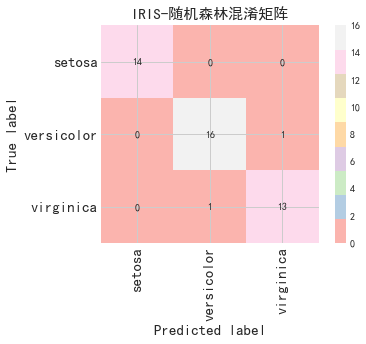

In [401]:
c_matrix_forest = confusion_matrix(y_test, y_predict)
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
print("随机森林混淆矩阵：\n",c_matrix_forest )
plot_confusion_matrix(c_matrix_forest,['setosa','versicolor','virginica'], "IRIS-随机森林混淆矩阵")
plt.show()

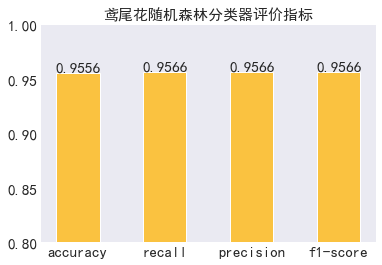

In [402]:
plt.style.use('seaborn-dark')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x = ["accuracy","recall","precision","f1-score"]
y = [accuracy_forest,recall_forest,precision_forest,f1_forest]
plt.ylim([0.8,1.0])
plt.bar(x, y,color='#FAC240',width = 0.5)
plt.title('鸢尾花随机森林分类器评价指标',fontsize = 15)
plt.tick_params(labelsize=15)
for a, b in zip(x, y):
    plt.text(a, b, "%.4f"%b, ha='center', va='bottom',fontsize = 15)
plt.show()

# 2.2 Adaboost模型

In [403]:
#决策树
my_deci_tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1)
#以决策树为基函数的adaboost分类器
my_ada = AdaBoostClassifier(base_estimator=my_deci_tree,learning_rate=1.0,n_estimators=400,algorithm='SAMME.R')
my_ada.fit(X_train,y_train)
y_predict = my_ada.predict(X_test)

In [404]:
#输出评价指标
c_matrix_adaboost = confusion_matrix(y_test, y_predict)
accuracy_adaboost = accuracy_score(y_test, y_predict)
recall_adaboost = recall_score(y_test,y_predict, average="macro")
precision_adaboost = precision_score(y_test, y_predict, average="macro")
f1_adaboost = f1_score(y_test, y_predict, average="macro") 
print("混淆矩阵：\n",c_matrix_adaboost)
print("accuracy;{0:.4f}\nrecall:{1:.4f}\nprecision:{2:.4f}\nf1:{3:.4f}".format(accuracy_adaboost,recall_adaboost,precision_adaboost,f1_adaboost))

混淆矩阵：
 [[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]
accuracy;0.9778
recall:0.9762
precision:0.9815
f1:0.9781


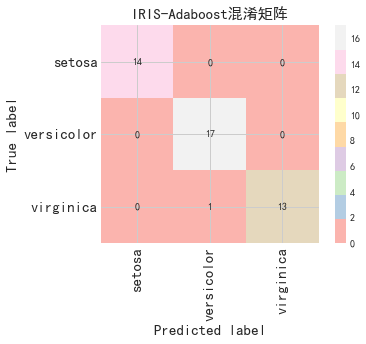

In [405]:
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plot_confusion_matrix(c_matrix_adaboost,['setosa','versicolor','virginica'], "IRIS-Adaboost混淆矩阵")
plt.show()

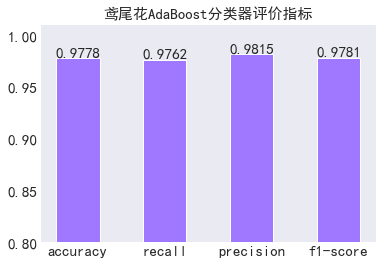

In [406]:
plt.style.use('seaborn-dark')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x = ["accuracy","recall","precision","f1-score"]
y = [accuracy_adaboost,recall_adaboost,precision_adaboost,f1_adaboost]
plt.ylim([0.8,1.01])
plt.bar(x, y,color='#A077FF',width = 0.5)
plt.title('鸢尾花AdaBoost分类器评价指标',fontsize = 15)
plt.tick_params(labelsize=15)
for a, b in zip(x, y):
    plt.text(a, b, "%.4f"%b, ha='center', va='bottom',fontsize = 15)
plt.show()

# 2.3 分类器性能比较

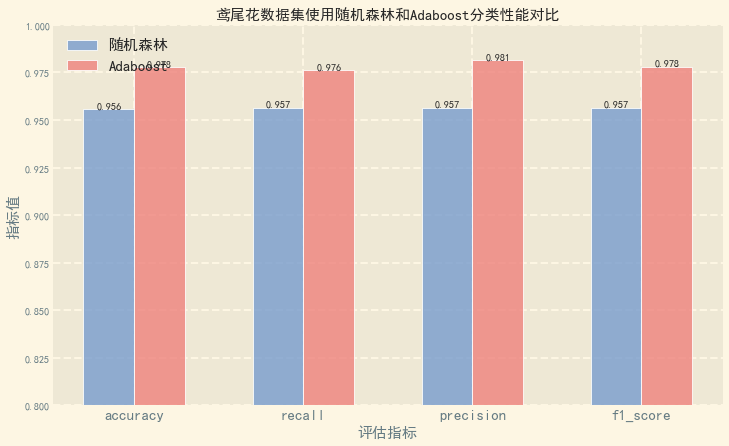

In [407]:
# 对比鸢尾花数据集在随机森林和Adaboost上的性能
forest_list=[accuracy_forest,recall_forest,precision_forest,f1_forest]
adaboost_list=[accuracy_adaboost,recall_adaboost,precision_adaboost,f1_adaboost]
plt.style.use('Solarize_Light2')
def autolabel(rects):
    for i in rects:
        h = i.get_height()
        plt.text(i.get_x() + i.get_width() / 2, h, '{:.3f}'.format(h), ha='center', va='bottom')
x = np.array(list(range(1,5)))
bar_width=0.3
plt.figure(figsize=(12,7))
plot_forest = plt.bar(x-bar_width/2, forest_list, width=bar_width,align='center',label = '随机森林',alpha = 0.8,color = '#789CCE')
plot_adaboost = plt.bar(x+bar_width/2,adaboost_list, width=bar_width,align='center',label = 'Adaboost',alpha = 0.8,color = '#EF827D')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('评估指标',size = 15)
plt.ylabel('指标值',size = 15)
plt.ylim([0.8,1.0])
autolabel(plot_forest)
autolabel(plot_adaboost)
plt.title('鸢尾花数据集使用随机森林和Adaboost分类性能对比',size = 15)
plt.grid(b = True,ls = '--',linewidth = 2)
plt.xticks(x,["accuracy","recall","precision","f1_score"] ,size = 15)
plt.legend(loc ='upper left',fontsize = 15)
plt.show()